<a href="https://colab.research.google.com/github/baepigyu/AI-Deep-Learning-Class/blob/main/Lec4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
x = tf.ones(shape = (2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [3]:
x = tf.zeros((2,1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [4]:
x = tf.random.normal(shape = (3,1),mean = 0, stddev = 1.)
print(x)

tf.Tensor(
[[-0.6617054]
 [ 2.0298915]
 [ 0.2478411]], shape=(3, 1), dtype=float32)


In [6]:
x = tf.random.uniform(shape = (3,1),minval = 0., maxval = 1.)
print(x)

tf.Tensor(
[[0.95653546]
 [0.95229566]
 [0.2319907 ]], shape=(3, 1), dtype=float32)


In [8]:
import numpy as np
x = np.ones(shape= (2,2))
print(x)
x[0,0]=0
print(x)

[[1. 1.]
 [1. 1.]]
[[0. 1.]
 [1. 1.]]


In [9]:
v = tf.Variable(initial_value = tf.random.normal(shape = (3,1)))
print(v)


<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.70625883],
       [-0.82312936],
       [-0.49533436]], dtype=float32)>


In [10]:
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [11]:
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [14]:
v = tf.Variable(initial_value = tf.random.normal(shape = (3,1)))
print(v)
# v[0,0] = 3.
# Variable은  item assignment가 되지 않는다.
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[0.5490508 ],
       [0.8746656 ],
       [0.05168074]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[0.5490508 ],
       [0.8746656 ],
       [0.05168074]], dtype=float32)>


In [15]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [16]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [17]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

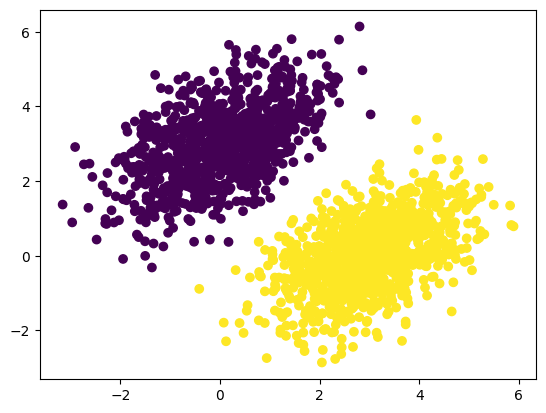

In [18]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [21]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [23]:
def model(inputs):
    return tf.matmul(inputs, W) + b
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [24]:
5%5

0

In [31]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"{step}번째 스텝의 손실: {loss:.4f}")

0번째 스텝의 손실: 0.0246
1번째 스텝의 손실: 0.0246
2번째 스텝의 손실: 0.0246
3번째 스텝의 손실: 0.0246
4번째 스텝의 손실: 0.0246
5번째 스텝의 손실: 0.0246
6번째 스텝의 손실: 0.0246
7번째 스텝의 손실: 0.0246
8번째 스텝의 손실: 0.0246
9번째 스텝의 손실: 0.0246
10번째 스텝의 손실: 0.0246
11번째 스텝의 손실: 0.0246
12번째 스텝의 손실: 0.0246
13번째 스텝의 손실: 0.0246
14번째 스텝의 손실: 0.0246
15번째 스텝의 손실: 0.0246
16번째 스텝의 손실: 0.0246
17번째 스텝의 손실: 0.0246
18번째 스텝의 손실: 0.0246
19번째 스텝의 손실: 0.0246
20번째 스텝의 손실: 0.0246
21번째 스텝의 손실: 0.0246
22번째 스텝의 손실: 0.0246
23번째 스텝의 손실: 0.0246
24번째 스텝의 손실: 0.0246
25번째 스텝의 손실: 0.0246
26번째 스텝의 손실: 0.0246
27번째 스텝의 손실: 0.0246
28번째 스텝의 손실: 0.0246
29번째 스텝의 손실: 0.0246
30번째 스텝의 손실: 0.0246
31번째 스텝의 손실: 0.0246
32번째 스텝의 손실: 0.0246
33번째 스텝의 손실: 0.0246
34번째 스텝의 손실: 0.0246
35번째 스텝의 손실: 0.0246
36번째 스텝의 손실: 0.0246
37번째 스텝의 손실: 0.0246
38번째 스텝의 손실: 0.0246
39번째 스텝의 손실: 0.0246


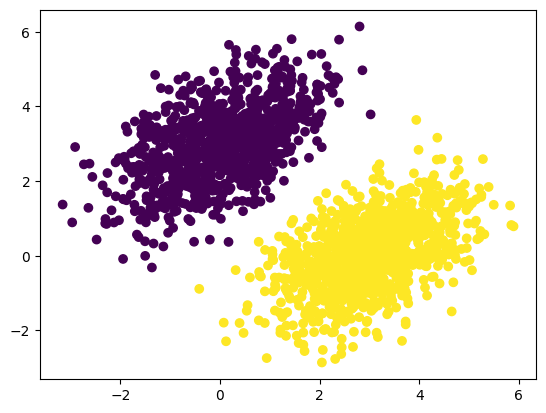

In [32]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

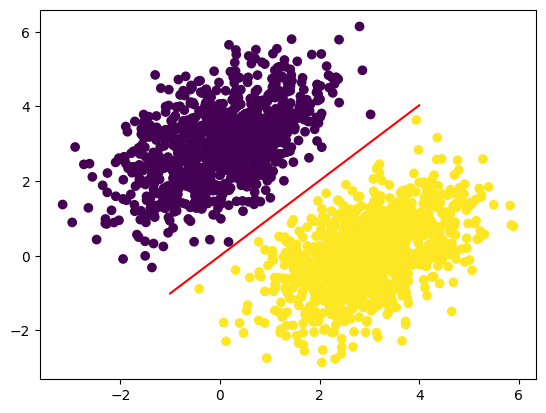

In [33]:
x = np.linspace(-1, 4, 100)
# 사실 100개의 x 축 좌표를 만들 필요 없이 시작과 종료 위치만 있어도 됩니다.
# x = [-1, 4]
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

In [34]:
def model(inputs):
    return tf.matmul(inputs, W) #+ b
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    #b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [35]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"{step}번째 스텝의 손실: {loss:.4f}")

0번째 스텝의 손실: 0.2743
1번째 스텝의 손실: 0.0931
2번째 스텝의 손실: 0.0876
3번째 스텝의 손실: 0.0874
4번째 스텝의 손실: 0.0874
5번째 스텝의 손실: 0.0874
6번째 스텝의 손실: 0.0874
7번째 스텝의 손실: 0.0874
8번째 스텝의 손실: 0.0874
9번째 스텝의 손실: 0.0874
10번째 스텝의 손실: 0.0874
11번째 스텝의 손실: 0.0874
12번째 스텝의 손실: 0.0874
13번째 스텝의 손실: 0.0874
14번째 스텝의 손실: 0.0874
15번째 스텝의 손실: 0.0874
16번째 스텝의 손실: 0.0874
17번째 스텝의 손실: 0.0874
18번째 스텝의 손실: 0.0874
19번째 스텝의 손실: 0.0874
20번째 스텝의 손실: 0.0874
21번째 스텝의 손실: 0.0874
22번째 스텝의 손실: 0.0874
23번째 스텝의 손실: 0.0874
24번째 스텝의 손실: 0.0874
25번째 스텝의 손실: 0.0874
26번째 스텝의 손실: 0.0874
27번째 스텝의 손실: 0.0874
28번째 스텝의 손실: 0.0874
29번째 스텝의 손실: 0.0874
30번째 스텝의 손실: 0.0874
31번째 스텝의 손실: 0.0874
32번째 스텝의 손실: 0.0874
33번째 스텝의 손실: 0.0874
34번째 스텝의 손실: 0.0874
35번째 스텝의 손실: 0.0874
36번째 스텝의 손실: 0.0874
37번째 스텝의 손실: 0.0874
38번째 스텝의 손실: 0.0874
39번째 스텝의 손실: 0.0874


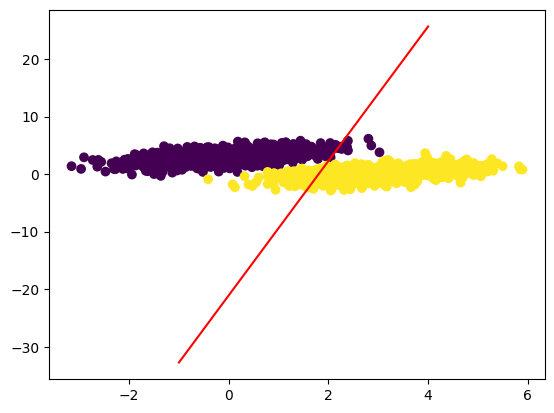

In [36]:
x = np.linspace(-1, 4, 100)
# 사실 100개의 x 축 좌표를 만들 필요 없이 시작과 종료 위치만 있어도 됩니다.
# x = [-1, 4]
y = - W[0] /  W[1] * x + (0.5) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

In [38]:
import tensorflow as tf

tf.keras.backend.set_floatx('float16')

In [39]:
from tensorflow.keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [54]:
train_data.shape

(25000,)

In [58]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [55]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()]
)
decoded_review =  [reverse_word_index.get(i - 3, "?") for i in train_data[0]]

In [42]:
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [57]:
len(word_index)

88584

In [41]:
decoded_review

['?',
 'this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 '?',
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 '?',
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 '?',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',
 'end',
 'it',

In [45]:
import numpy as np
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1
        return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [47]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [48]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [49]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16,activation = 'relu'),
    layers.Dense(16,activation = 'relu'),
    layers.Dense(1,activation = 'sigmoid')
])

In [51]:
model.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])


In [52]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [53]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size =512,
                    validation_data = (x_val,y_val))

Epoch 1/20
30/30 [==============================] - 39s 1s/step - loss: 0.6929 - accuracy: 0.5024 - val_loss: 0.6934 - val_accuracy: 0.4949
Epoch 2/20
30/30 [==============================] - 49s 2s/step - loss: 0.6929 - accuracy: 0.5029 - val_loss: 0.6934 - val_accuracy: 0.4949
Epoch 3/20
30/30 [==============================] - 43s 1s/step - loss: 0.6929 - accuracy: 0.5034 - val_loss: 0.6934 - val_accuracy: 0.4949
Epoch 4/20
30/30 [==============================] - 42s 1s/step - loss: 0.6924 - accuracy: 0.5039 - val_loss: 0.6934 - val_accuracy: 0.4949
Epoch 5/20
22/30 [=====================>........] - ETA: 7s - loss: 0.6934 - accuracy: 0.5034

KeyboardInterrupt: 

In [ ]:
model3 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [ ]:
model.compile(optimizer = 'rmsprop',
               loss = 'mse',
               metrics = ['accuracy'])

In [ ]:
model2 = keras.Sequential([
    layers.Dense(1,activation = 'sigmoid')
])
model.compile(optimizer = 'adma',
              loss = 'crossentropy')

In [ ]:
model4 = keras.Sequential([
    layers.Dense(64,activation = 'tanh'),
    layers.Dense(64,activation = 'tanh'),
    layers.Dense(46,activation = 'sigmoid')
])
model.compile()

In [59]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [63]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [60]:
train_labels[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [62]:
y_train[:10].shape

(10, 46)

In [65]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [70]:
model = keras.Sequential([
    layers.Dense(64,activation = 'relu'),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(46,activation = 'softmax')
])

In [71]:
model.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
              # sparse와 car
              # onthot 인코딩을 스스로 했으면 categoricla crossentropy를 사용해야함.
               metrics = ['accuracy'])

In [72]:
model.fit(x_train,
          y_train,
          epochs = 9,
          batch_size = 512)
results = model.evaluate(x_test,y_test)

ValueError: Data cardinality is ambiguous:
  x sizes: 25000
  y sizes: 8982
Make sure all arrays contain the same number of samples.

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [73]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step
